In [12]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from sklearn.metrics import accuracy_score

In [13]:
train_data = datasets.CIFAR10(root="./data",train=True,download=True,transform=transforms.ToTensor())
test_data = datasets.CIFAR10(root="./data",train=False,download=True,transform=transforms.ToTensor())

In [14]:
train_loader = torch.utils.data.DataLoader(train_data,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=len(test_data),shuffle=False)

In [15]:
dataiter = iter(train_loader)
images,labels = next(dataiter)

In [16]:
images.shape, labels.shape


(torch.Size([16, 3, 32, 32]), torch.Size([16]))

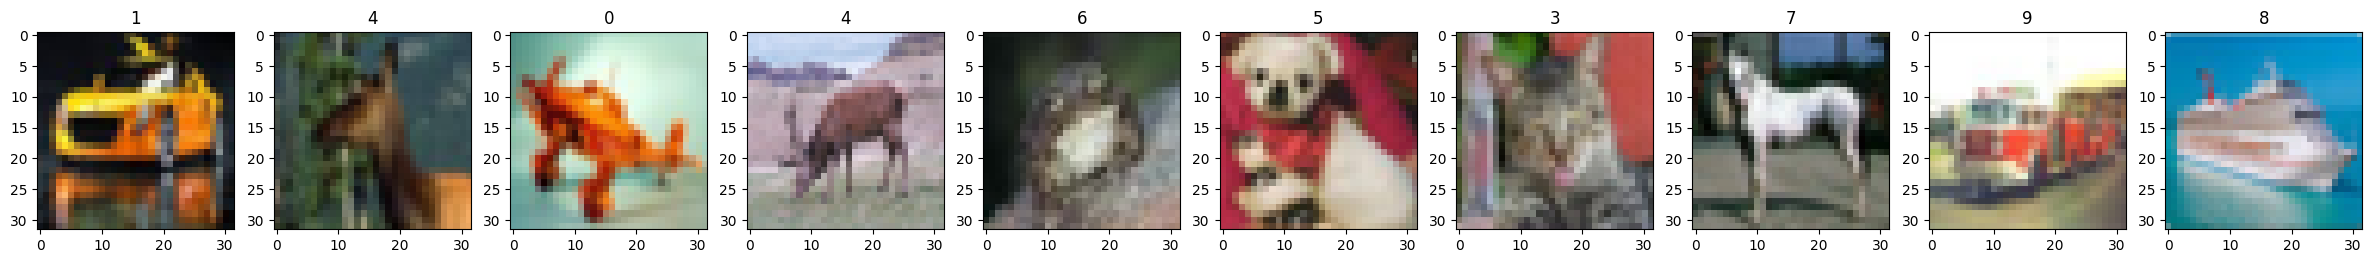

In [17]:
def show_imgs(imgs, labels):
    f, axes= plt.subplots(1, 10, figsize=(30,5))
    for i, axis in enumerate(axes):
      axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(), (1, 2, 0))), cmap='gray')
      axes[i].set_title(labels[i].numpy())
    plt.show()

show_imgs(images, labels)


In [18]:
num_to_name = {
    0: "Самолет",
    1: "Автомобиль",
    2: "Птица",
    3: "Кошка",
    4: "Олень",
    5: "Собака",
    6: "Лягушка",
    7: "Лошадь",
    8: "Корабль",
    9: "Грузовик"
}

In [19]:
import torch.nn as nn
import torch.nn.functional as F

In [20]:
class Flatten(nn.Module):
    def forward(self,input):
        return input.view(input.size(0),-1) 
class SimpleNet(nn.Module):
    def __init__(self): 
        super().__init__()
        self.flatten = Flatten()
        self.fc1 = nn.Linear(3*32*32,256)
        self.fc2 = nn.Linear(256,10)
    def forward(self,x):
        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))
        return x

In [21]:
def train(net,n_epoch = 2):
    loss_fn=nn.CrossEntropyLoss()

    leaning_rate=1e-3
    optimizer = torch.optim.Adam(net.parameters(),lr=leaning_rate)
    for epoch in tqdm(range(n_epoch)):

        running_loss = 0.0
        batchiter = iter(train_loader)
        for i,batch in enumerate(tqdm(batchiter)):
            x_batch,y_batch = batch

            optimizer.zero_grad()
            y_pred = net(x_batch)

            loss = loss_fn(y_pred,y_batch)

            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
            if i % 500 == 499:
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 500))
              running_loss = 0.0
    print("обучение закончено")
    return net


In [22]:
net = SimpleNet()
net = train(net)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

C:\Users\v_smy\AppData\Local\Temp\ipykernel_1656\3182953066.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[1,   500] loss: 2.356
[1,  1000] loss: 2.363
[1,  1500] loss: 2.364
[1,  2000] loss: 2.360
[1,  2500] loss: 2.359
[1,  3000] loss: 2.362


  0%|          | 0/3125 [00:00<?, ?it/s]

[2,   500] loss: 2.359
[2,  1000] loss: 2.361
[2,  1500] loss: 2.360
[2,  2000] loss: 2.368
[2,  2500] loss: 2.358
[2,  3000] loss: 2.358
обучение закончено


In [24]:
test_dataiter = iter(test_loader)
images, labels = next(test_dataiter)

In [25]:
accuracy_score(labels.numpy(), np.argmax(net.forward(images).detach().numpy(), axis=1))

C:\Users\v_smy\AppData\Local\Temp\ipykernel_1656\3182953066.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


0.1

In [26]:
class Flatten(nn.Module):
    def forward(self,batch):
        return batch.view(batch.size(0),-1)
class Conv_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.cv1 = nn.Conv2d(3,20,kernel_size=3)
        self.cv2 = nn.Conv2d(20,3,kernel_size=3)
        self.flatten = Flatten()
        self.fc = nn.Linear(2352,10)

    def forward(self,x):
        x = F.relu(self.cv1(x))
        x = F.relu(self.cv2(x))
        x = self.flatten(x)
        x = F.softmax(self.fc(x))
        return x


In [27]:
new_net = Conv_Net()
new_net = train(new_net)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

C:\Users\v_smy\AppData\Local\Temp\ipykernel_1656\445470733.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc(x))


[1,   500] loss: 2.194
[1,  1000] loss: 2.129
[1,  1500] loss: 2.100
[1,  2000] loss: 2.084
[1,  2500] loss: 2.084
[1,  3000] loss: 2.071


  0%|          | 0/3125 [00:00<?, ?it/s]

[2,   500] loss: 2.069
[2,  1000] loss: 2.055
[2,  1500] loss: 2.052
[2,  2000] loss: 2.056
[2,  2500] loss: 2.055
[2,  3000] loss: 2.043
обучение закончено


In [28]:
test_dataiter = iter(test_loader)
test_im,test_lab = next(test_dataiter)

In [29]:
accuracy_score(test_lab.numpy(),np.argmax(new_net.forward(test_im).detach().numpy(),axis=1))

C:\Users\v_smy\AppData\Local\Temp\ipykernel_1656\445470733.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc(x))


0.4161